# New York Taxi Ride Analysis
## Overview
This notebook analyzes taxi ride data to uncover patterns in fares, distances, and ride characteristics across New York City.

## Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Import and Initial Exploration
The dataset contains taxi ride information including locations, times, fares, and ride characteristics.

In [2]:
df = pd.read_csv('final_internship_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

## Data Preprocessing
### Column Renaming and DateTime Conversion
We perform initial data cleaning by:
1. Renaming distance columns for better clarity
2. Converting timestamp columns to proper datetime format

In [3]:
# Rename columns for clarity
df.rename(columns={
    "jfk_dist": "jfk_airport_distance",
    "lga_dist": "lga_airport_distance",
    "ewr_dist": "ewr_airport_distance",
    "sol_dist": "statue_of_liberty_distance",
    "nyc_dist": "nyc_center_distance"
}, inplace=True)

# Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


df.columns[-25:]

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_airport_distance', 'ewr_airport_distance',
       'lga_airport_distance', 'statue_of_liberty_distance',
       'nyc_center_distance', 'distance', 'bearing'],
      dtype='object')

## Driver and User Analysis
We analyze the frequency of drivers and users in the system to understand usage patterns.

In [4]:
df["Driver Name"].value_counts().reset_index(name='count').query("count > 1")

,Driver Name,count
0,Michael Smith,257
1,David Smith,191
2,Michael Johnson,183
3,Michael Williams,167
4,James Smith,164
...,...,...
85075,Connie Washington,2
85076,Brandy Hughes,2
85077,Jordan Porter,2
85078,Lisa Mcconnell,2


In [5]:
# Replace each name with how often it appears

driver_freq = df['Driver Name'].value_counts()
df['driver_freq'] = df['Driver Name'].map(driver_freq)

df.columns[-28:]


Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_airport_distance', 'ewr_airport_distance',
       'lga_airport_distance', 'statue_of_liberty_distance',
       'nyc_center_distance', 'distance', 'bearing', 'driver_freq'],
      dtype='object')

In [6]:
df["User Name"].value_counts().reset_index(name='count').query("count > 1")

,User Name,count
0,Michael Smith,224
1,Michael Johnson,200
2,Michael Brown,165
3,Michael Williams,158
4,David Smith,152
...,...,...
85283,Kristen Joseph,2
85284,Mary Swanson,2
85285,Sara Watts,2
85286,Brenda Johnston,2


In [7]:
# Replace each name with how often it appears

driver_freq = df['User Name'].value_counts()
df['User_freq'] = df['User Name'].map(driver_freq)

df.columns[-30:]

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_airport_distance', 'ewr_airport_distance',
       'lga_airport_distance', 'statue_of_liberty_distance',
       'nyc_center_distance', 'distance', 'bearing', 'driver_freq',
       'User_freq'],
      dtype='object')

In [8]:
df.drop(columns=[
    "User ID", "key", "User Name", "Driver Name"
], inplace=True)

df.columns[-30:]

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'weekday', 'year', 'jfk_airport_distance',
       'ewr_airport_distance', 'lga_airport_distance',
       'statue_of_liberty_distance', 'nyc_center_distance', 'distance',
       'bearing', 'driver_freq', 'User_freq'],
      dtype='object')

## Time Series Analysis
### Datetime Processing
Converting and consolidating temporal data for analysis:
- Combining separate date/time fields
- Calculating time differences between reservation and pickup

In [9]:
# Convert reservation date and time to a single datetime column
df['reservation_datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']].assign(minute=0, second=0))
df.drop(['hour', 'day', 'month', 'year'], axis=1, inplace=True)
df.columns[-30:]

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'weekday',
       'jfk_airport_distance', 'ewr_airport_distance', 'lga_airport_distance',
       'statue_of_liberty_distance', 'nyc_center_distance', 'distance',
       'bearing', 'driver_freq', 'User_freq', 'reservation_datetime'],
      dtype='object')

In [10]:
# Check if there is a difference between pickup_datetime and reservation_datetime more than 1 hour

time_diff = (df['pickup_datetime'] - df['reservation_datetime']).dt.total_seconds() / 3600
time_diff.describe()


count    500000.000000
mean          0.496972
std           0.288937
min           0.000000
25%           0.249722
50%           0.500000
75%           0.750000
max           0.999722
dtype: float64

## Exploratory Data Analysis
### 1. Correlation Analysis
Examining relationships between numerical variables using a correlation heatmap

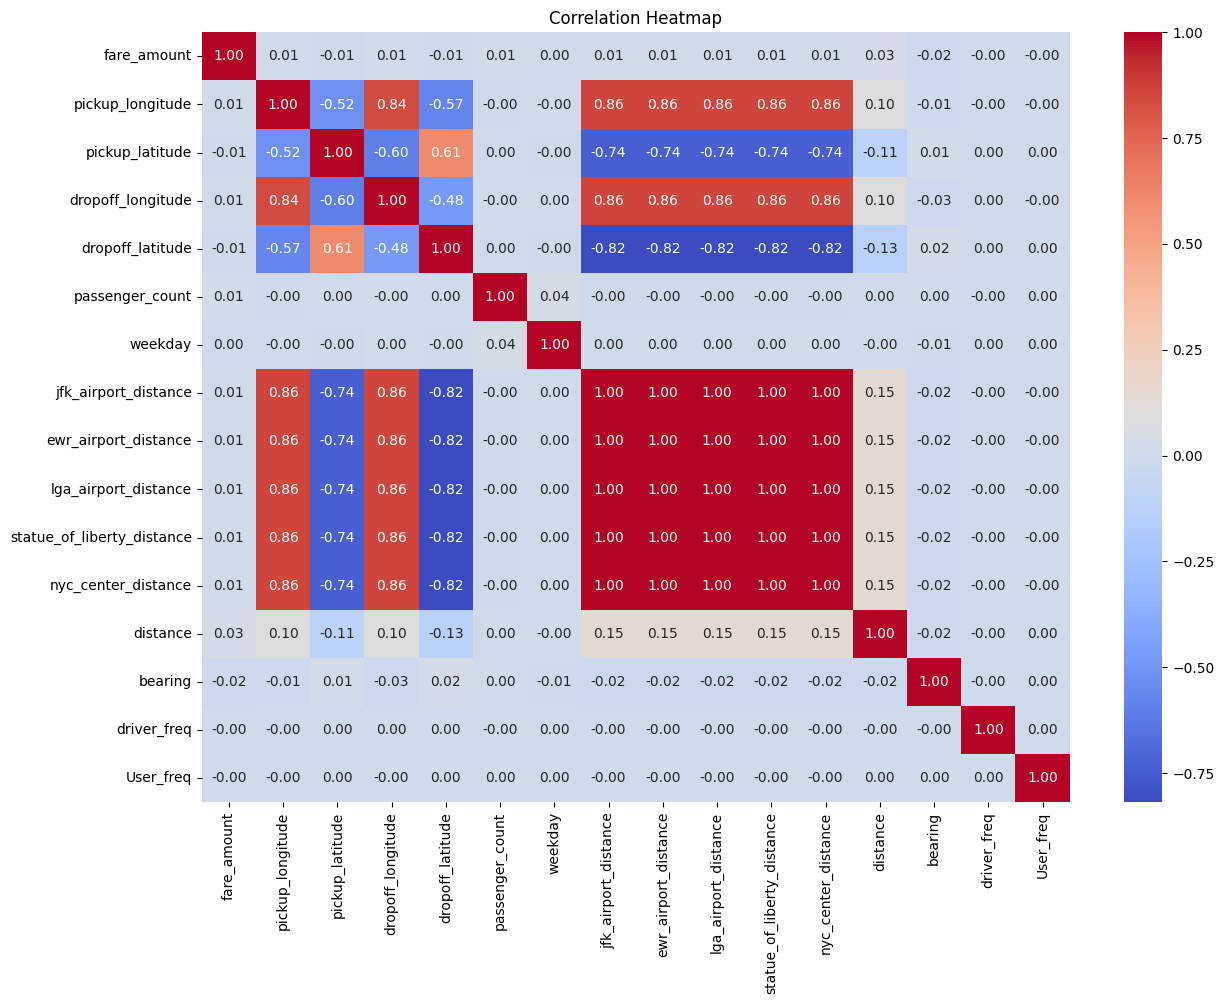

In [11]:
### 2. Correlation Heatmap
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(14, 10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### 2. Geographic Analysis
Analyzing distances to major landmarks and their impact on rides

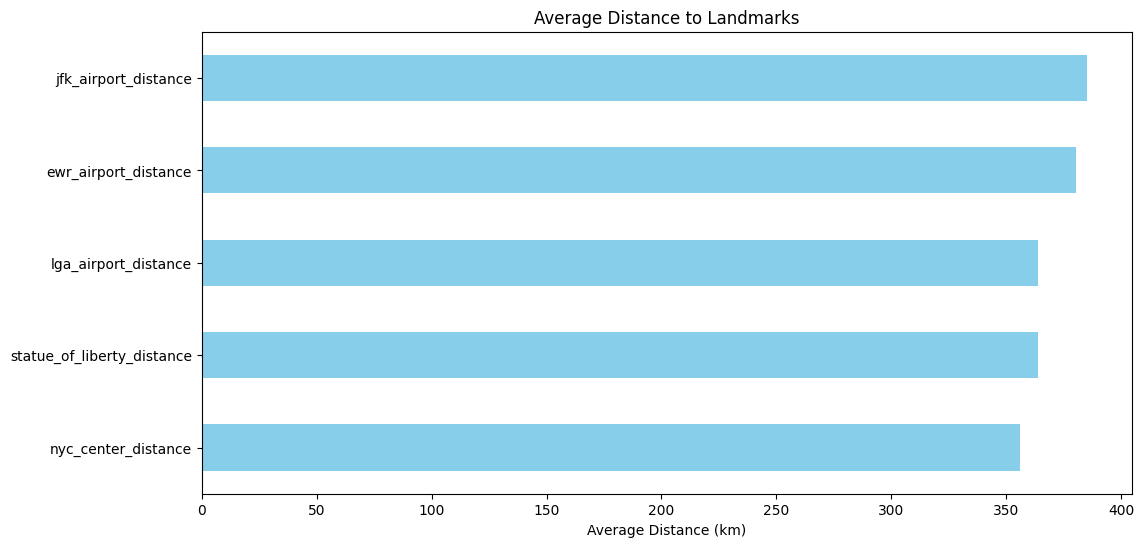

In [12]:
### 3. Landmark Distance Analysis
landmarks = ['jfk_airport_distance', 'ewr_airport_distance', 'lga_airport_distance',
             'statue_of_liberty_distance', 'nyc_center_distance']

plt.figure(figsize=(12, 6))
df[landmarks].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title("Average Distance to Landmarks")
plt.xlabel("Average Distance (km)")
plt.show()

### 3. Categorical Variable Analysis
Examining the distribution and impact of:
- Car Condition
- Weather
- Traffic Condition

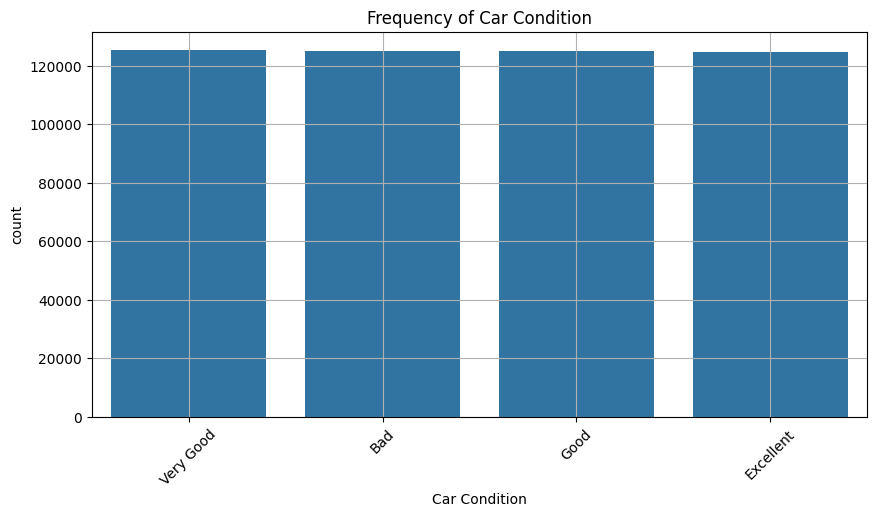

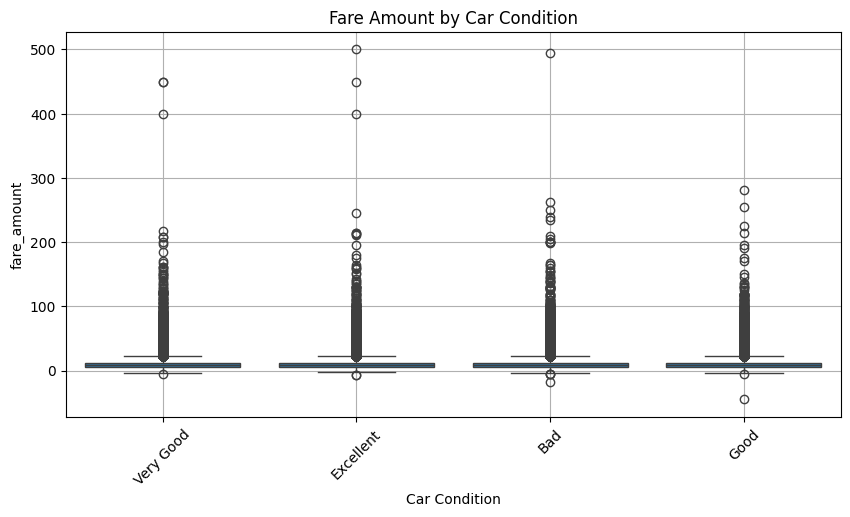

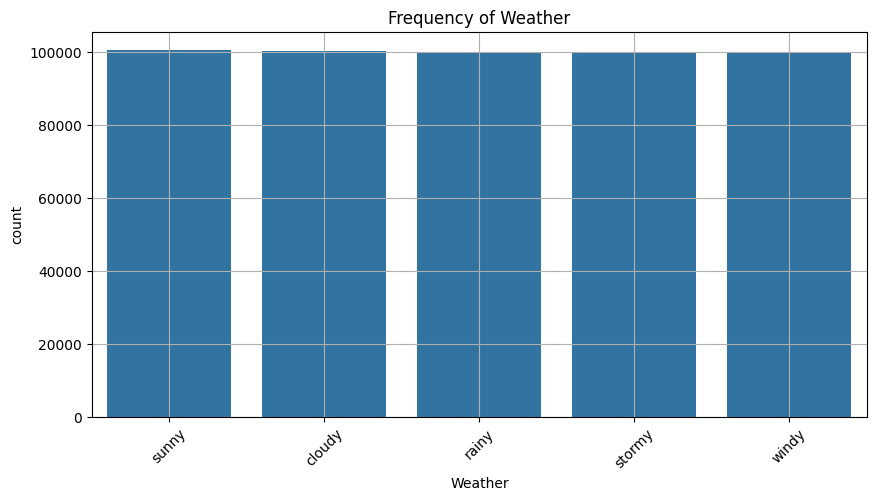

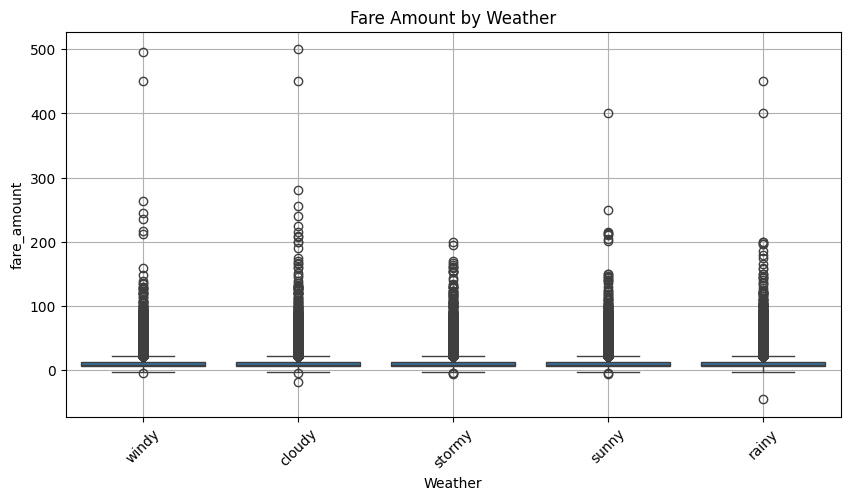

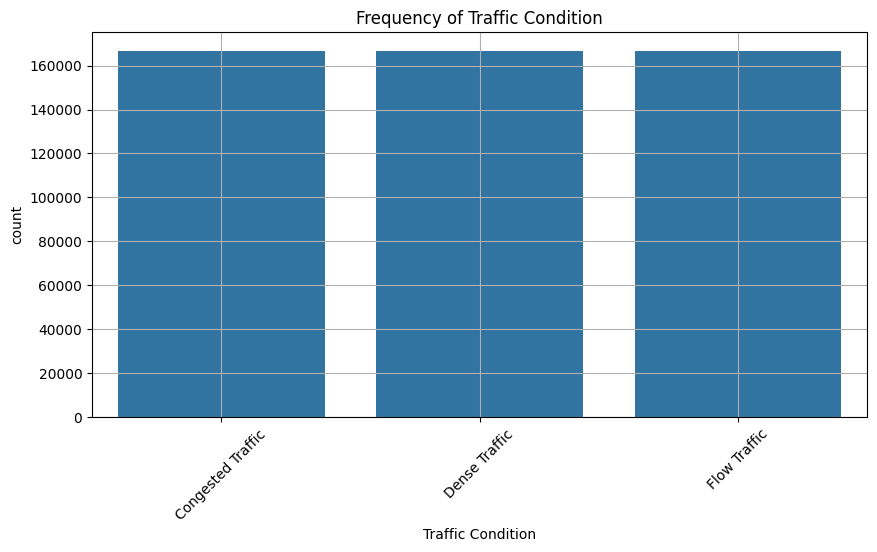

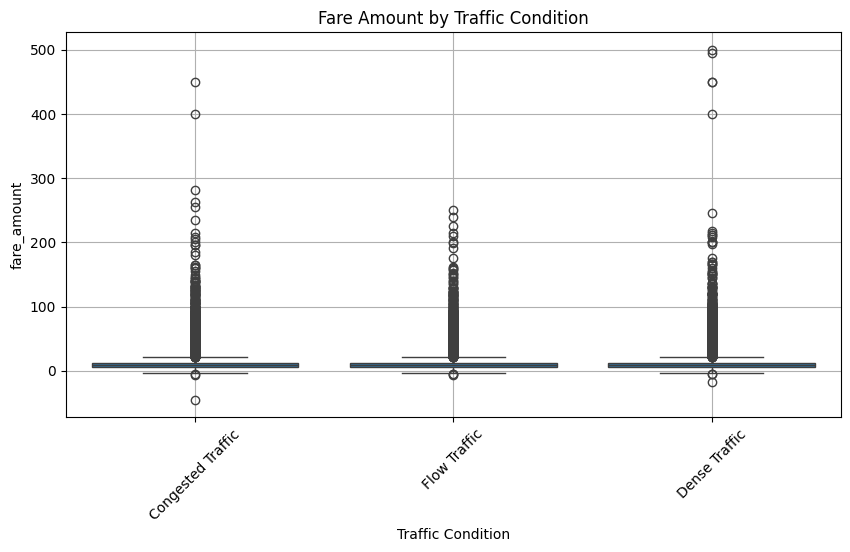

In [13]:
### 4. Categorical Analysis
cat_cols = ['Car Condition', 'Weather', 'Traffic Condition']

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Relation to fare
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='fare_amount')
    plt.title(f"Fare Amount by {col}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### 4. Passenger Analysis
Understanding how passenger count affects:
- Fare amounts
- Trip distances

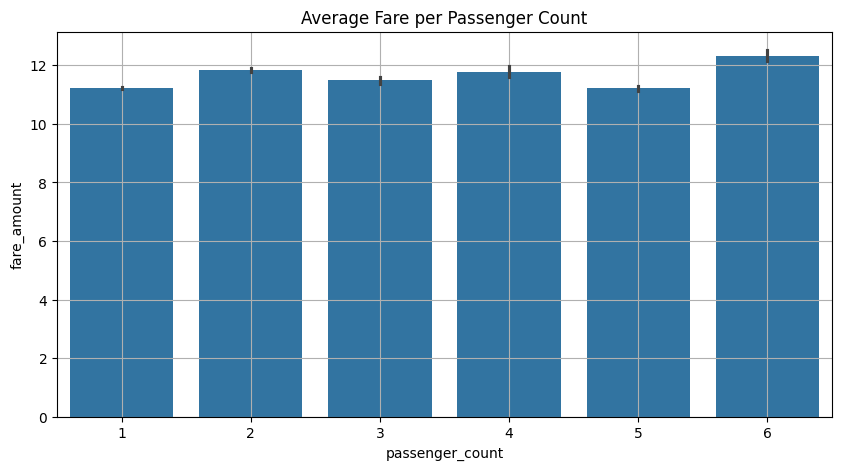

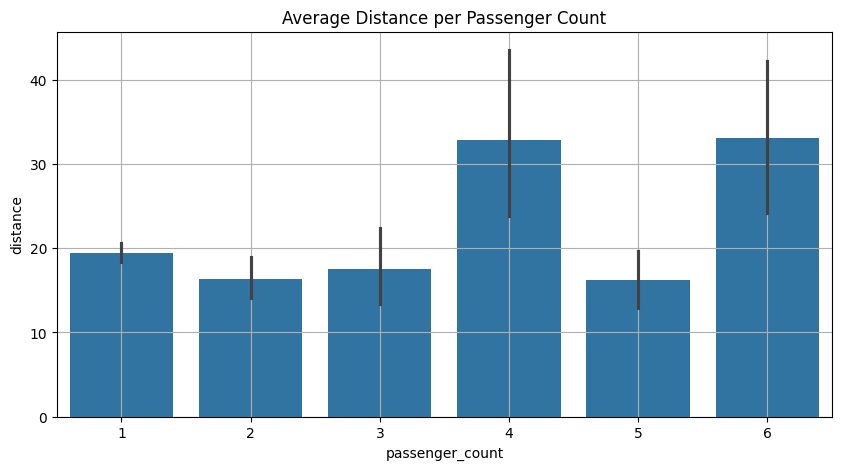

In [14]:
### 5. Passenger Count Analysis
# Filter out passenger_count of 0
valid_passengers = df[df['passenger_count'] > 0]

plt.figure(figsize=(10, 5))
sns.barplot(x='passenger_count', y='fare_amount', data=valid_passengers, estimator=np.mean)
plt.title("Average Fare per Passenger Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='passenger_count', y='distance', data=valid_passengers, estimator=np.mean)
plt.title("Average Distance per Passenger Count")
plt.grid(True)
plt.show()

### 5. Temporal Patterns
Analyzing ride patterns across:
- Hours of the day
- Days of the week
- Fare variations by time

C:\Users\koky3\AppData\Local\Temp\ipykernel_23240\127848570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette="viridis")


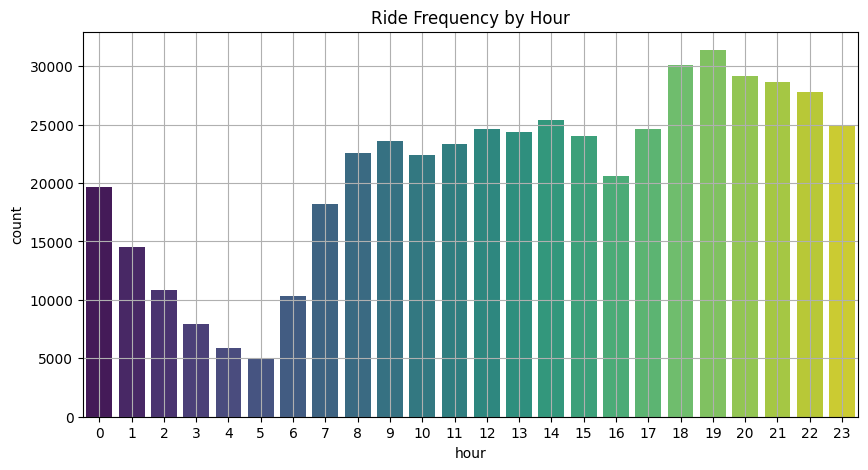

In [15]:
### 6. Time-Based Patterns
# Ride frequency by hour
df['hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df, palette="viridis")
plt.title("Ride Frequency by Hour")
plt.grid(True)
plt.show()


C:\Users\koky3\AppData\Local\Temp\ipykernel_23240\4049328140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='fare_amount', data=df, estimator=np.mean, palette="mako")


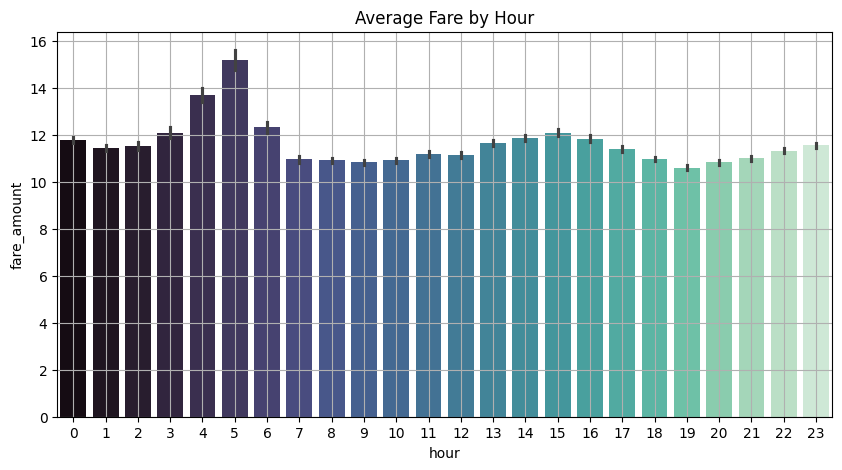

In [16]:
# Avg fare by hour
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='fare_amount', data=df, estimator=np.mean, palette="mako")
plt.title("Average Fare by Hour")
plt.grid(True)
plt.show()

C:\Users\koky3\AppData\Local\Temp\ipykernel_23240\3689287331.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday_name', data=df, palette="cubehelix",


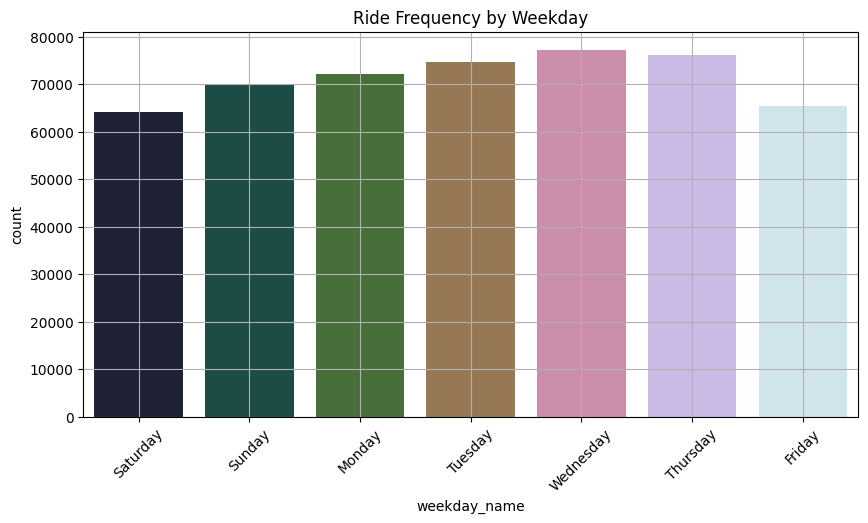

In [17]:
# Rides by weekday
weekday_map = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 
               4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
df['weekday_name'] = df['weekday'].map(weekday_map)

plt.figure(figsize=(10, 5))
sns.countplot(x='weekday_name', data=df, palette="cubehelix", 
              order=[weekday_map[i] for i in range(7)])
plt.title("Ride Frequency by Weekday")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\koky3\AppData\Local\Temp\ipykernel_23240\3410587234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='fare_amount', data=df, estimator=np.mean, palette="ch:s=-.2,r=.6")


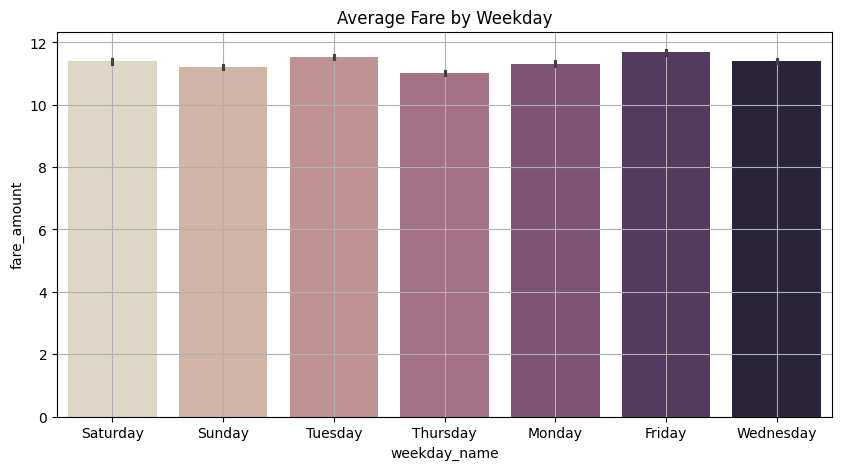

In [18]:
# Avg fare by weekday
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday_name', y='fare_amount', data=df, estimator=np.mean, palette="ch:s=-.2,r=.6")
plt.title("Average Fare by Weekday")
plt.grid(True)
plt.show()